In [62]:
import os, sys
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
def get_data_from_file(train_file):
    train_data = []
    # enter your code here (7 points)
    with open(train_file) as fp:
        lines = fp.readlines()
    for k, line in enumerate(lines):
        print('{:6d} / {:6d}'.format((k+1), len(lines)), end='\r')
        img_path = 'train/' + line.strip()
        try:
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, (48, 48))
            if line.split('.')[0] == 'cat':
                label = 0
            elif line.split('.')[0] == 'dog':
                label = 1
            train_data.append([img_resized, label])
        except:
            print("ERROR: Can't read this image:", img_path)
    return train_data

def get_image_and_label(train_data):
    # enter your code here (8 points)
    X_train = []
    Y_train = []
    for data in train_data:# [[a,b], [c,d],...]
        X_train.append(data[0])
        Y_train.append(data[1])
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    return X_train, Y_train

def assignment4b_1():
	train_file = 'train_list.txt'
	test_file = 'test_list.txt'
	train_data = get_data_from_file(train_file)
	X_train, Y_train = get_image_and_label(train_data)
	print()  
	test_data = get_data_from_file(test_file)
	X_test, Y_test = get_image_and_label(test_data)
	print()
	print(len(train_data))
	print(train_data[0][0].shape)
	print(len(test_data))
	print(test_data[0][0].shape)

	save_path = 'dogs_cats.pkl'
	print('Saving to', save_path)
	data = {}
	data['X_train'] = X_train
	data['Y_train'] = Y_train
	data['X_test'] = X_test
	data['Y_test'] = Y_test
	pickle.dump(data, open(save_path, 'wb'))

def build_model():
  	# enter your code here, and remove the following pass (15 points)
	model = keras.Sequential([
        keras.Input(shape=(48, 48, 3)),
		keras.layers.Conv2D(32, 3, padding='same', activation=tf.nn.relu),
		keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Conv2D(32, 3, padding='same', activation=tf.nn.relu),
		keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Conv2D(32, 3, padding='same', activation=tf.nn.relu),
		keras.layers.MaxPool2D(pool_size=(2, 2)),
		keras.layers.Flatten(),
		keras.layers.Dense(2, activation=tf.nn.softmax)
 	])
	return model

def assignment4b_2():
	data = pickle.load(open("dogs_cats.pkl","rb"))
	X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
	X_train = X_train / 255.0
	X_test = X_test / 255.0
	model = build_model()
	model.summary()
	model.compile(optimizer='adam', 
					loss='sparse_categorical_crossentropy',
					metrics=['accuracy'])
	ck_dir = "ckpt_dogcat"
	checkpoint_path = ck_dir+"/cp-{epoch:04d}.weights.h5"
	cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, save_freq=10)
	batch_size = 64
	epochs = 60
	# enter your code here (5 points)
	tb_callback = TensorBoard(log_dir='log_dogcat')
	history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                     callbacks=[cp_callback, tb_callback], validation_split=0.1, shuffle=True)
	
	test_loss, test_acc = model.evaluate(X_test, Y_test)
	print(f"\033[93mTest ACC = {test_acc*100:.2f}%, Test loss = {test_loss:.4f}\033[0m")
	
	pickle.dump(history.history, open('history.pkl', 'wb'))

def assignment4b_3():
	# enter your code here, and remove the following pass (5 points)
    history = pickle.load(open("history.pkl","rb")) # return a dict with keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']
    plt.figure()
    plt.plot(range(len(history['accuracy'])), history['accuracy'], 'b-', label="train")
    plt.plot(range(len(history['val_accuracy'])), history['val_accuracy'], '-', color='orange', label="val")
    plt.title('Training & Validation accuracy')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(range(len(history['loss'])), history['loss'], 'b-', label="train")
    plt.plot(range(len(history['val_loss'])), history['val_loss'], '-', color='orange', label="val")
    plt.title('Training & Validation loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.grid(True)
    plt.show()

def assignment4b_4():
	# enter your code here, and remove the following pass (5 points)
    data = pickle.load(open("dogs_cats.pkl","rb"))
    X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    model = build_model()
    model.compile(optimizer='adam', 
					loss='sparse_categorical_crossentropy',
					metrics=['accuracy'])
    for i in os.listdir("ckpt_dogcat"):
        if int(i.split('.')[0][-2:]) % 10 == 0: # 10, 20, ..., 60
            pth = os.path.join("ckpt_dogcat", i)
            model.load_weights(pth)
            loss, acc = model.evaluate(X_test, Y_test)
            print(f"Epoch [{i.split('.')[0][-2:]}/60]: test ACC = {acc*100:.2f}%, test loss = {loss:.4f}")


In [15]:
if __name__ == '__main__':
    assignment4b_1() # do not modify this line

 20000 /  20000
  5000 /   5000
20000
(48, 48, 3)
5000
(48, 48, 3)
Saving to dogs_cats.pkl


In [36]:
    assignment4b_2() # do not modify this line

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         2,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,698 (84.76 KB)

 Trainable params: 21,698 (84.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
  6/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4948 - loss: 0.7005   
Epoch 1: saving model to ckpt_dogcat/cp-0001.weights.h5
 16/282 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5019 - loss: 0.6988
Epoch 1: saving model to ckpt_dogcat/cp-0001.weights.h5
 26/282 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5055 - loss: 0.6973
Epoch 1: saving model to ckpt_dogcat/cp-0001.weights.h5
 36/282 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5099 - loss: 0.6962
Epoch 1: saving model to ckpt_dogcat/cp-0001.weights.h5
 46/282 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5132 - loss: 0.6954
Epoch 1: saving model to ckpt_dogcat/cp-0001.weights.h5
 56/282 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5179 - loss: 0.6946
Epoch 1: saving model to ckpt_dogcat/cp-0001.weights.h5
 66/282 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5225 - loss: 0.6937
Epoch 1: saving model to ckpt_dogcat/cp-0001.weights.h5
 76/282 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5266 -

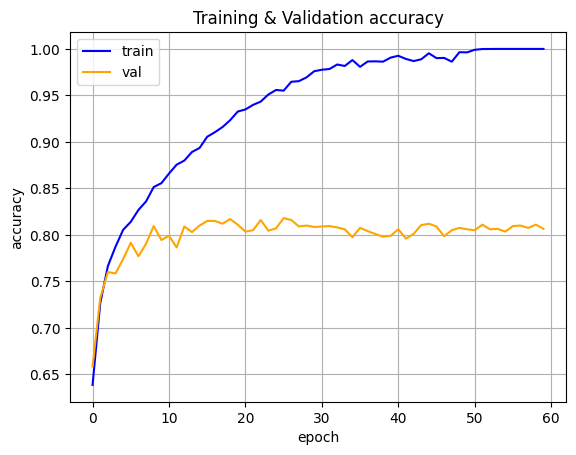

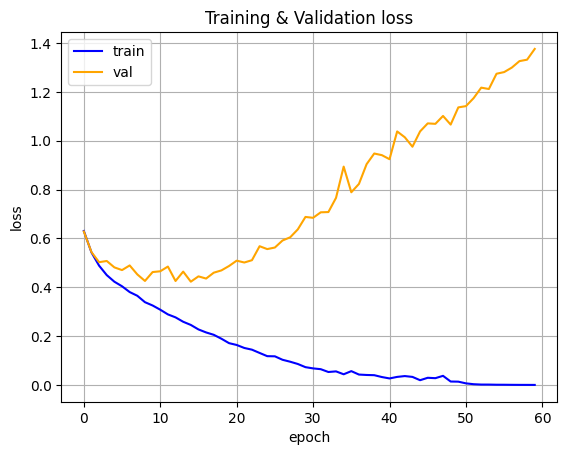

In [68]:
    assignment4b_3() # do not modify this line

In [69]:
    assignment4b_4() # do not modify this line

c:\Users\User\anaconda3\envs\env_cv\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4262
Epoch [10/60]: test ACC = 80.92%, test loss = 0.4249
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4496
Epoch [20/60]: test ACC = 82.66%, test loss = 0.4706
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.6449
Epoch [30/60]: test ACC = 81.70%, test loss = 0.6692
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.9327
Epoch [40/60]: test ACC = 80.52%, test loss = 0.9632
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 1.1075
Epoch [50/60]: test ACC = 81.10%, test loss = 1.1666
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8170 - loss: 1.3364
Epoch [60/60]: test ACC = 81.08%, test loss = 1.3847


In [ ]:
# Question 1 (5 points): If we set shuffle=False during the execution of model.fit() in Assignment 4b-2,
# which was previously set to shuffle=True, what impact will this have on the validation accuracy?
# Write down your answer here.
# 這樣會每個epoch中訓練資料的順序都相同，會導致訓練較沒有變化性，模型在訓練時可能會先看到一堆同類型資料，造成梯度更新偏差，對 validation set 的泛化能力變差。
# 如果訓練資料的前半段都是同一種類別，會使權重預測出來偏向此類別，然後後半段較難以再調整回來，因此驗證集的資料較難判斷正確(偏向某一類別)，
# 進而使validation accuracy會更容易波動或降低。

In [ ]:
# Question 2 (5 points): In Assignment 4b-4, what epoch yields the highest test accuracy, and what is the reason for this?
# Write down your answer here.
# 20th epoch有最高的測試準確率(82.66%)，因為此時正處於漸漸邁入過擬和訓練集的階段，可以看到訓練時，驗證集準確率最高的部分就出現在這附近，代表對於預測未知的資料，這個階段是最適合的，而在後續的階段中，val_loss持續往上增加。